In [1]:
# Import libraries

import numpy as np 
import pandas as pd
import time
# pip install --upgrade matplotlib (if necessary)
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing
import matplotlib.pyplot as plt


### Data preprocessing

In [2]:
# Import MNIST datasets
df_test_full = pd.read_csv('/Users/mathiascardarellofierro/Documents/DSE/Year 1/Machine Learning/mnist_test.csv')
df_train_full = pd.read_csv('/Users/mathiascardarellofierro/Documents/DSE/Year 1/Machine Learning/mnist_train.csv')

In [3]:
df_train_full.head() # The training set is composed by 784 features (pixels) and 1 label (digit)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(df_train_full.shape) # The training set size is 60.000
print(df_test_full.shape) # The test set size is 10.000

(60000, 785)
(10000, 785)


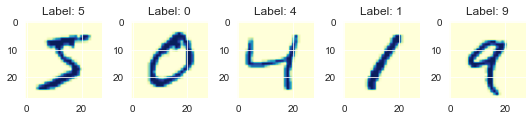

In [71]:
# Examples of digits
num = 5
num_row = 1
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5 * num_col, 2 * num_row))
for i in range(num):
    ax = axes[i%num_col]
    pixels = np.array(df_train_full.iloc[i, 1:785], dtype='uint8')
    pixels = pixels.reshape((28,28))
    ax.imshow(pixels, cmap='YlGnBu')
    ax.set_title('Label: {}'.format(df_train_full.iloc[i, 0]))
plt.tight_layout()
plt.savefig('examples.png')
plt.show()

In [5]:
# Get random stratified samples of the training (10%) and test (30%) sets

df_train = df_train_full.groupby('label', group_keys=False).apply(lambda x: x.sample(600, random_state=14))
df_test = df_test_full.groupby('label', group_keys=False).apply(lambda x: x.sample(300, random_state=14))

print(df_train.shape)
print(df_test.shape)

(6000, 785)
(3000, 785)


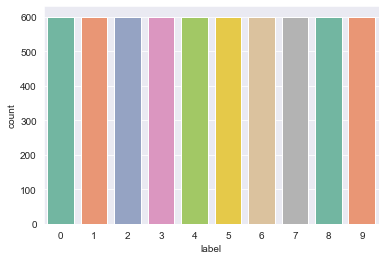

In [7]:
# Histogram of the train set sample (is balanced)

sn.set_style('darkgrid')
sn.countplot(x = "label", data = df_train, palette="Set2") 
plt.savefig('histogram_train_sample.png')
plt.show()

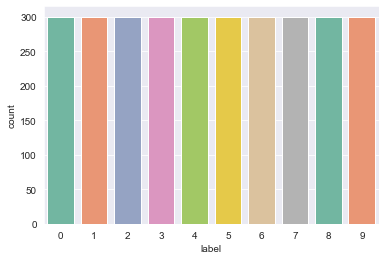

In [8]:
# Histogram of the test set sample (is balanced)

sn.set_style('darkgrid')
sn.countplot(x = "label", data = df_test, palette="Set2") 
plt.savefig('histogram_test_sample.png')
plt.show()

In [9]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
4515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2067,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Splitting into X (examples) and Y (label) and convert them into numpy arrays
X_train = np.array(df_train.iloc[:, 1:785], dtype=np.float32)/255 #normalize values in the range of 0-255
Y_train = np.array(df_train.iloc[:, 0])

X_test = np.array(df_test.iloc[:, 1:785], dtype=np.float32)/255 #normalize values in the range of 0-255
Y_test = np.array(df_test.iloc[:, 0])

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(6000, 784)
(6000,)
(3000, 784)
(3000,)


In [12]:
# OneHotEnocoding labels Y into {-1, 1}
lb = preprocessing.LabelBinarizer(neg_label=-1)
Y_train = lb.fit_transform(Y_train).astype('int8')
Y_test = lb.fit_transform(Y_test).astype('int8')

### Definition of functions

In [13]:
# Polynomial Kernel function of degree d

def pol_kernel(x1, x2, d):
    return np.float32((1 + np.matmul(x1, x2.T)) ** d)

In [14]:
# Computation of Kernel matrix

K0 = np.zeros((X_train.shape[0], X_train.shape[0]), dtype=np.float32) # matrix initialization

def K_matrix(x, K, d):
  x_len = x.shape[0]
  for i in range(x_len):
    for j in range(x_len):
      K[i,j] = pol_kernel(x[i], x[j], d)
  return K

In [15]:
# Training the Kernel Perceptron

def train(X, Y, K, epochs, row):
    # K is the Kernel matrix
    y_pred = []
    alpha = np.zeros((len(X)))
    for epoch in range(epochs):
        for i in range(len(X)):
            S = np.dot((alpha * Y[:,row]),K[i,:])
            if S * Y[i, row] <= 0:
                alpha[i] += 1
        predictor = alpha.copy()
        y_pred.append(predictor)
    return y_pred

In [16]:
# Compute the average of the predictors in the ensemble 

def avg_predictor(y_pred):                  
    # y_pred is a list of binary predictors
    avg_pred = []
    for i in y_pred:
        S = np.array(i)
        S = S.mean(axis = 0)
        avg_pred.append(S)
    avg_pred = np.array(avg_pred)
    return avg_pred

In [17]:
# Compute the best predictors in the ensemble (minimizing zero-one loss training error)

def best_predictor(X, Y, M, pred):
    pred_list = []
    for index, list_ in enumerate(pred):
        value_error = []
        for ind, predictor in enumerate(list_):
            errors = 0
            for i in range(len(X)):
                y_hat = np.dot((predictor * Y[:,index]), M[i,:])
                if Y[i,index] * y_hat <= 0:
                    errors += 1 
            value = (errors / len(X)) * 100
            value_error.append(value)
        value_error = np.array(value_error)
        index_min = np.argmin(value_error)
        best = list_[index_min]
        pred_list.append(best)
        #pred_list = np.append(pred_list, best)
    return pred_list

In [18]:
# Training Accuracy

def accuracy_train(Y_train, best_pred, K):              
    #best_pred is the array of fitted predictors
    #K is the kernel matrix
    num_correct = 0
    for i in range(len(Y_train)):
        pred = np.zeros(len(best_pred))
        for j in range(len(best_pred)):
            pred[j] = np.dot((best_pred[j] * Y_train[:, j]), K[i,:])
        y_hat = np.argmax(pred)
        y_label = np.argmax(Y_train[i,:])
        if y_hat == y_label:
            num_correct +=  1
    acc = (num_correct / len(Y_train)) * 100
    return acc

In [19]:
# Test Accuracy

def accuracy_test(Y_train, Y_test, best_pred, K):
    #best_pred is the set of fitted predictors
    #K is the kernel matrix
    num_correct = 0
    for i in range(len(Y_test)):
        pred = np.zeros(len(best_pred))
        for j in range(len(best_pred)):
                pred[j] =  np.dot((best_pred[j] * Y_train[:, j]), K[i,:])
        y_hat = np.argmax(pred)
        y_label = np.argmax(Y_test[i,:])
        if y_hat == y_label:
            num_correct += 1
    acc = (num_correct / len(Y_test)) * 100
    return acc

In [20]:
# Confusion matrix

def confusion_matrix(Y_train, Y_test, best_pred, K):
    #best_pred is the set of fitted predictors
    #K is the kernel matrix
    conf_matrix = np.zeros(shape=(Y_train.shape[1], Y_train.shape[1]))
    for i in range(len(Y_test)):
        predict = np.zeros(len(best_pred))
        for j in range(len(best_pred)):
                predict[j] =  np.dot((best_pred[j] * Y_train[:, j]), K[i,:])
        y_hat = np.argmax(predict)
        y_label = np.argmax(Y_test[i,:])
        conf_matrix[y_label, y_hat] += 1
    return conf_matrix

In [21]:
# Polynomial kernel Perceptron to make multiclass predictions (One vs All predictors)

def poly_perceptron(X_train, X_test, Y_train, Y_test, d, epochs):
    M = pol_kernel(X_train, X_train, d)
    OvA_predictors = []
    
    for digits in range(Y_train.shape[1]):
        predictor = train(X_train, Y_train, M, epochs, digits) 
        OvA_predictors.append(predictor)
    
    M_test = pol_kernel(X_test, X_train, d)
    
    pred_best = best_predictor(X_train, Y_train, M, OvA_predictors)
    pred_mean = avg_predictor(OvA_predictors)
    result = []
    
    n_test = accuracy_test(Y_train, Y_test, pred_best, M_test)
    result.append(n_test)
    
    n_train = accuracy_train(Y_train, pred_best, M)
    result.append(n_train)
    
    n_test = accuracy_test(Y_train, Y_test, pred_mean, M_test)
    result.append(n_test)
    
    n_train = accuracy_train(Y_train, pred_mean, M)
    result.append(n_train)
    
    conf_matrix_best = confusion_matrix(Y_train, Y_test, pred_best, M_test)
    result.append(conf_matrix_best)
    
    conf_matrix_mean = confusion_matrix(Y_train, Y_test, pred_mean, M_test)
    result.append(conf_matrix_mean)
    
    return(result)

In [22]:
#Loop for training Polynomial Kernel Perceptron for degrees of the polynomial up to "d" and epochs up to "n"

def digitClassifier(X_train, X_test, Y_train, Y_test, d, n):
# d = max degree of the polynomial kernel
# n = max epochs
    start_time = time.time()
    ypred_best, ypred_mean = [], []

    #Initilization of the FOR loop for training the predictors
    for degree in range(1,d+1):   
    # Set polynomial degrees between 1 to d
        degree_result = []
        for epochs in range(1,n+1):
        # Set number of epochs up to n
            train_test = poly_perceptron(X_train, X_test, Y_train, Y_test, degree, epochs)
            degree_result.append(train_test)
        degree_result = np.array(degree_result)
        degree_result_best = degree_result[:,0:2]
        degree_result_mean = degree_result[:,2:4]
        ypred_best.append(degree_result_best)
        ypred_mean.append(degree_result_mean)

    print("--- %s seconds ---" % (time.time() - start_time))
    return ypred_best, ypred_mean

### Training the predictors

In [23]:
best, avg = digitClassifier(X_train, X_test, Y_train, Y_test, 7, 11)  #2.291,57 sec (38 min) for degree up to 7 and 11 epochs

<ipython-input-22-3fe50783b8d7>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  degree_result = np.array(degree_result)


--- 2291.5717129707336 seconds ---


In [25]:
# Search for the predictors with maximum accuracy, upon grade of the polynomial and epochs

search_best = np.array(best)
search_mean = np.array(avg)
ind_best = np.unravel_index(np.argmax(search_best[:,:,0], axis=None), search_best[:,:,0].shape)
ind_mean = np.unravel_index(np.argmax(search_mean[:,:,0], axis=None), search_mean[:,:,0].shape)
print("Best accuracy" , ind_best)
print("Average accuracy" , ind_mean)

Best accuracy (6, 10)
Average accuracy (6, 10)


In [26]:
# Get new random stratified samples of the training (10%) and test (30%) sets

df_train_2 = df_train_full.groupby('label', group_keys=False).apply(lambda x: x.sample(600, random_state=24))   # 10% original train set
df_test_2 = df_test_full.groupby('label', group_keys=False).apply(lambda x: x.sample(300, random_state=24))     # 30% original test set

# Splitting into X (examples) and Y (label) and convert them into numpy arrays
X_train_2 = np.array(df_train_2.iloc[:, 1:785], dtype=np.float32)/255 #normalize values in the range of 0-255
Y_train_2 = np.array(df_train_2.iloc[:, 0])

X_test_2 = np.array(df_test_2.iloc[:, 1:785], dtype=np.float32)/255 #normalize values in the range of 0-255
Y_test_2 = np.array(df_test_2.iloc[:, 0])

# OneHotEnocoding labels Y into {-1, 1}
lb = preprocessing.LabelBinarizer(neg_label=-1)
Y_train_2 = lb.fit_transform(Y_train_2).astype('int8')
Y_test_2 = lb.fit_transform(Y_test_2).astype('int8')


In [27]:
# Retrain Kernel perceptron with the best combination of polynomial degree and epochs that achieves the predictor with the smallest training error

start_time_2 = time.time()
best_2 = poly_perceptron(X_train_2, X_test_2, Y_train_2, Y_test_2, (ind_best[0]), (ind_best[1]))
print(best_2[0], best_2[1], best_2[4])
print("--- %s seconds ---" % (time.time() - start_time_2)) # 57.28 seconds

94.93333333333334 99.55000000000001 [[295.   1.   0.   1.   1.   0.   1.   0.   1.   0.]
 [  0. 298.   0.   0.   0.   0.   1.   0.   1.   0.]
 [  2.   1. 283.   3.   2.   0.   2.   2.   4.   1.]
 [  0.   4.   1. 283.   0.   3.   0.   0.   8.   1.]
 [  0.   2.   2.   0. 274.   0.   4.   0.   4.  14.]
 [  2.   2.   0.   3.   0. 274.   5.   0.  13.   1.]
 [  2.   1.   1.   0.   0.   1. 289.   0.   6.   0.]
 [  0.   0.   4.   1.   2.   1.   0. 281.   3.   8.]
 [  4.   2.   3.   4.   0.   0.   0.   2. 284.   1.]
 [  2.   1.   2.   0.   2.   3.   0.   2.   1. 287.]]
--- 57.2819709777832 seconds ---


In [30]:
# Retrain Kernel perceptron with the best combination of polynomial degree and epochs of the average of the predictors in the ensemble

start_time_3 = time.time()
mean_2 = poly_perceptron(X_train_2, X_test_2, Y_train_2, Y_test_2, (ind_mean[0]), (ind_mean[1])) # Using datasets 2
print(mean_2[2], mean_2[3], mean_2[5])
print("--- %s seconds ---" % (time.time() - start_time_3)) # 37.98 sec


91.3 96.63333333333334 [[293.   0.   1.   1.   1.   0.   1.   0.   3.   0.]
 [  0. 297.   0.   0.   0.   0.   1.   0.   2.   0.]
 [  1.   1. 272.   4.   1.   1.   3.   2.  13.   2.]
 [  0.   2.   1. 257.   0.   5.   0.   1.  32.   2.]
 [  0.   0.   1.   0. 240.   0.   8.   3.   4.  44.]
 [  1.   1.   0.   3.   0. 250.   6.   0.  34.   5.]
 [  2.   1.   0.   0.   0.   1. 288.   0.   8.   0.]
 [  0.   0.   4.   0.   0.   1.   0. 260.   5.  30.]
 [  1.   0.   0.   1.   0.   0.   1.   3. 291.   3.]
 [  0.   1.   1.   1.   1.   3.   0.   2.   0. 291.]]
--- 53.08324193954468 seconds ---


### Analysis of the results

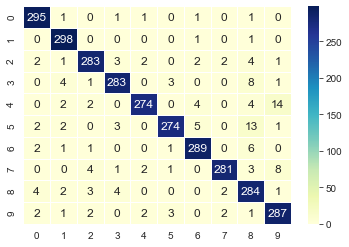

In [31]:
# Confusion matrix for Best predictor

conf_1 = pd.DataFrame(best_2[4], range(10), range(10))
sn.heatmap(conf_1, annot=True, annot_kws={"size": 12}, cmap = "YlGnBu", fmt='g', linewidths=.5)

#save plot
plt.savefig('best_conf_matrix.png', bbox_inches = 'tight')

#show plot
plt.show()

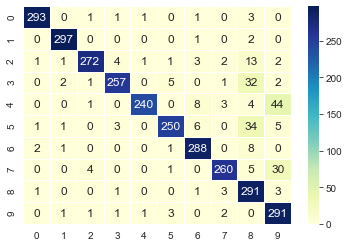

In [32]:
# Confusion matrix for Average predictor

conf_2 = pd.DataFrame(mean_2[5], range(10), range(10))
sn.heatmap(conf_2, annot=True, annot_kws={"size": 12}, cmap = "YlGnBu", fmt='g', linewidths=.5)

#save plot
plt.savefig('avg_conf_matrix.png', bbox_inches = 'tight')

#show plot
plt.show()

In [33]:
# Precision and Recall performance metrics

def perf_metrics(conf_matrix):
    TP = np.diag(conf_matrix)
    FP = np.sum(conf_matrix, axis=0) - TP
    FN = np.sum(conf_matrix, axis=1) - TP
    digits = 10
    TN = []
    for i in range(digits):
        temp = np.delete(conf_matrix, i, 0)    
        temp = np.delete(temp, i, 1)  
        TN.append(sum(sum(temp)))
    metrics = []
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    metrics.extend((precision, recall))
    return(metrics)

In [34]:
metrics_best = perf_metrics(best_2[4])
metrics_mean = perf_metrics(mean_2[5])

/Users/mathiascardarellofierro/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


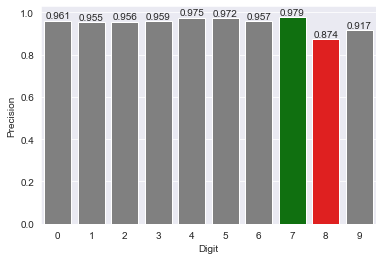

In [52]:
# Plot Precision for each digit - Best predictor

x = list(range(0, 10))
y_precision_best = metrics_best[0]
clrs = clrs = ['green' if (precision >= y_precision_best.max()) else 'red'  if (precision <= y_precision_best.min())  
                        else 'grey' for precision in y_precision_best ]
fig = sn.barplot(x, y_precision_best, palette=clrs)
fig.bar_label(fig.containers[0], fmt='%.3f')

fig.set(xlabel = "Digit", ylabel = "Precision") 

fig = fig.get_figure()
fig.savefig('precision_best_classifier.png', bbox_inches = 'tight') #save plot

/Users/mathiascardarellofierro/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


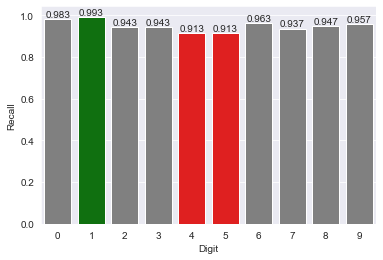

In [53]:
# Plot Recall for each digit - Best predictor

x = list(range(0, 10))
y_recall_best = metrics_best[1]
clrs = clrs = ['green' if (recall >= y_recall_best.max()) else 'red'  if (recall <= y_recall_best.min())  
                        else 'grey' for recall in y_recall_best ]
fig = sn.barplot(x, y_recall_best, palette=clrs)
fig.bar_label(fig.containers[0], fmt='%.3f')

fig.set(xlabel = "Digit", ylabel = "Recall") 

fig = fig.get_figure()
fig.savefig('recall_best_classifier.png', bbox_inches = 'tight') #save plot

/Users/mathiascardarellofierro/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


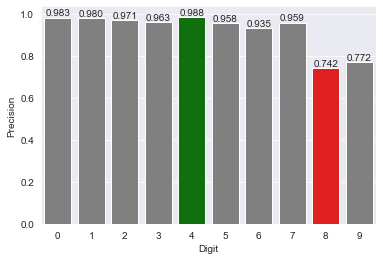

In [54]:
# Plot Precision for each digit - Avg predictor

x = list(range(0, 10))
y_precision_mean = metrics_mean[0]
clrs = clrs = ['green' if (precision >= y_precision_mean.max()) else 'red'  if (precision <= y_precision_mean.min())  
                        else 'grey' for precision in y_precision_mean ]
fig = sn.barplot(x, y_precision_mean, palette=clrs)
fig.bar_label(fig.containers[0], fmt='%.3f')

fig.set(xlabel = "Digit", ylabel = "Precision") 

fig = fig.get_figure()
fig.savefig('precision_mean_classifier.png', bbox_inches = 'tight') #save plot

/Users/mathiascardarellofierro/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


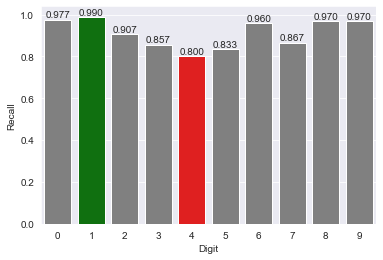

In [55]:
# Plot Recall for each digit - Avg predictor

x = list(range(0, 10))
y_recall_mean = metrics_mean[1]
clrs = clrs = ['green' if (recall >= y_recall_mean.max()) else 'red'  if (recall <= y_recall_mean.min())  
                        else 'grey' for recall in y_recall_mean ]
fig = sn.barplot(x, y_recall_mean, palette=clrs)
fig.bar_label(fig.containers[0], fmt='%.3f')

fig.set(xlabel = "Digit", ylabel = "Recall") 

fig = fig.get_figure()
fig.savefig('recall_mean_classifier.png', bbox_inches = 'tight') #save plot

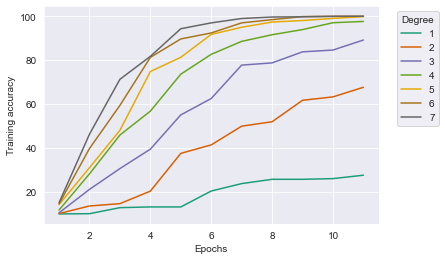

In [57]:
# Training accuracy by epoch - Best predictor

x = np.linspace(1, 11, 11)
degrees = 7
cmap = plt.get_cmap('Dark2')
colors = [cmap(i) for i in np.linspace(0, 1, degrees)]

for i, color in enumerate(colors, start=1):
    plt.plot(x, best[i-1][:,1], color=color, label='{i}'.format(i=i))
plt.legend(bbox_to_anchor=(1.04,1), title="Degree", loc="best")

# naming the x axis
plt.xlabel('Epochs')
# naming the y axis
plt.ylabel('Training accuracy')

#save plot
plt.savefig('best_train_acc.png', bbox_inches = 'tight')
    
plt.show()

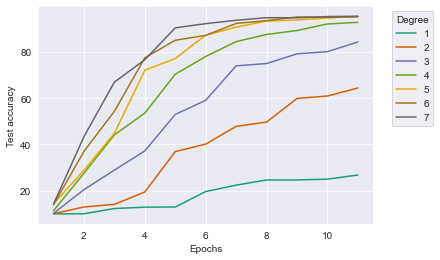

In [58]:
# Test accuracy by epoch - Best predictor

for i, color in enumerate(colors, start=1):
    plt.plot(x, best[i-1][:,0], color=color, label='{i}'.format(i=i))
plt.legend(bbox_to_anchor=(1.04,1), title="Degree", loc="best")

# naming the x axis
plt.xlabel('Epochs')
# naming the y axis
plt.ylabel('Test accuracy')

#save plot
plt.savefig('best_test_acc.png', bbox_inches = 'tight')
    
plt.show()

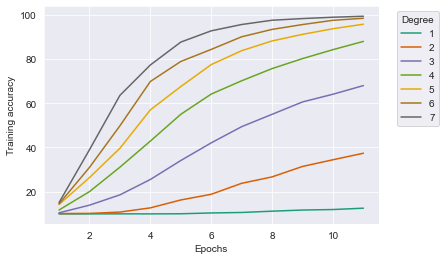

In [59]:
# Training accuracy by epoch - Average predictor

x = np.linspace(1, 11, 11)
degrees = 7
cmap = plt.get_cmap('Dark2')
colors = [cmap(i) for i in np.linspace(0, 1, degrees)]

for i, color in enumerate(colors, start=1):
    plt.plot(x, avg[i-1][:,1], color=color, label='{i}'.format(i=i))
plt.legend(bbox_to_anchor=(1.04,1), title="Degree", loc="best")

# naming the x axis
plt.xlabel('Epochs')
# naming the y axis
plt.ylabel('Training accuracy')

#save plot
plt.savefig('avg_train_acc.png', bbox_inches = 'tight')
    
plt.show()

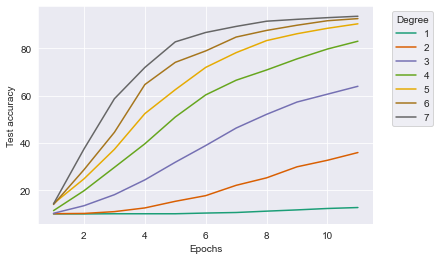

In [60]:
# Test accuracy by epoch - Average predictor

for i, color in enumerate(colors, start=1):
    plt.plot(x, avg[i-1][:,0], color=color, label='{i}'.format(i=i))
plt.legend(bbox_to_anchor=(1.04,1), title="Degree", loc="best")

# naming the x axis
plt.xlabel('Epochs')
# naming the y axis
plt.ylabel('Test accuracy')

#save plot
plt.savefig('avg_test_acc.png', bbox_inches = 'tight')
    
plt.show()